# Introduction
**We are going to work with the well-known supervised machine learning algorithm called k-NN or k-Nearest Neighbors. For this exercise, we will use the Iris data set for classification. The attribute Species of the data set will be the variable that we want to predict.**

# Import all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# Import Iris dataset

In [2]:
df = pd.read_csv('Iris.csv',index_col=0)

In [31]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [30]:
df.shape

(150, 5)

In [6]:
x = df.drop(['Species'],axis=1)
y = df['Species']

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Some Explenatory Data Analysis with Iris

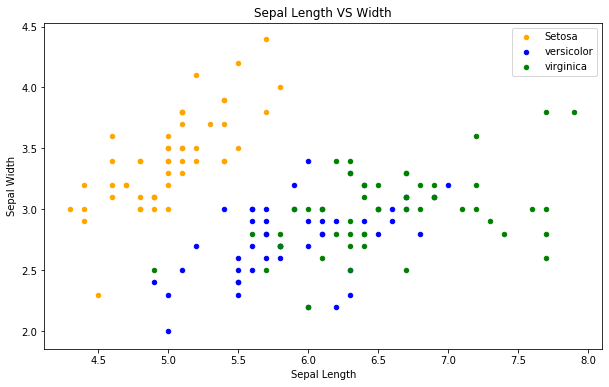

In [9]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

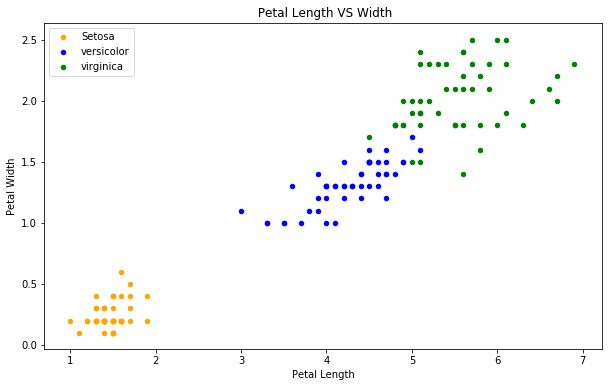

In [10]:
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. 

# Now let us see how are the length and width are distributed

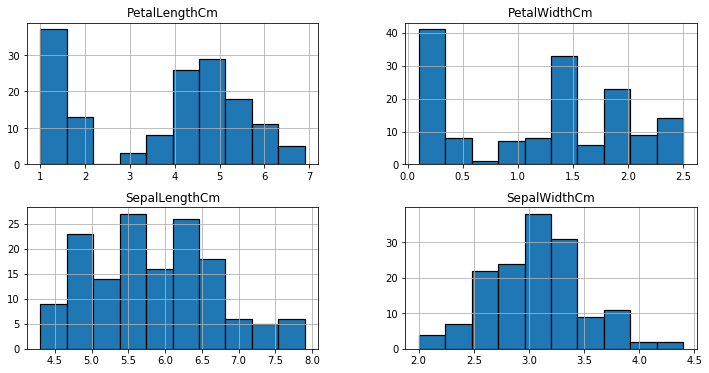

In [11]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

c:\users\abhishek\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


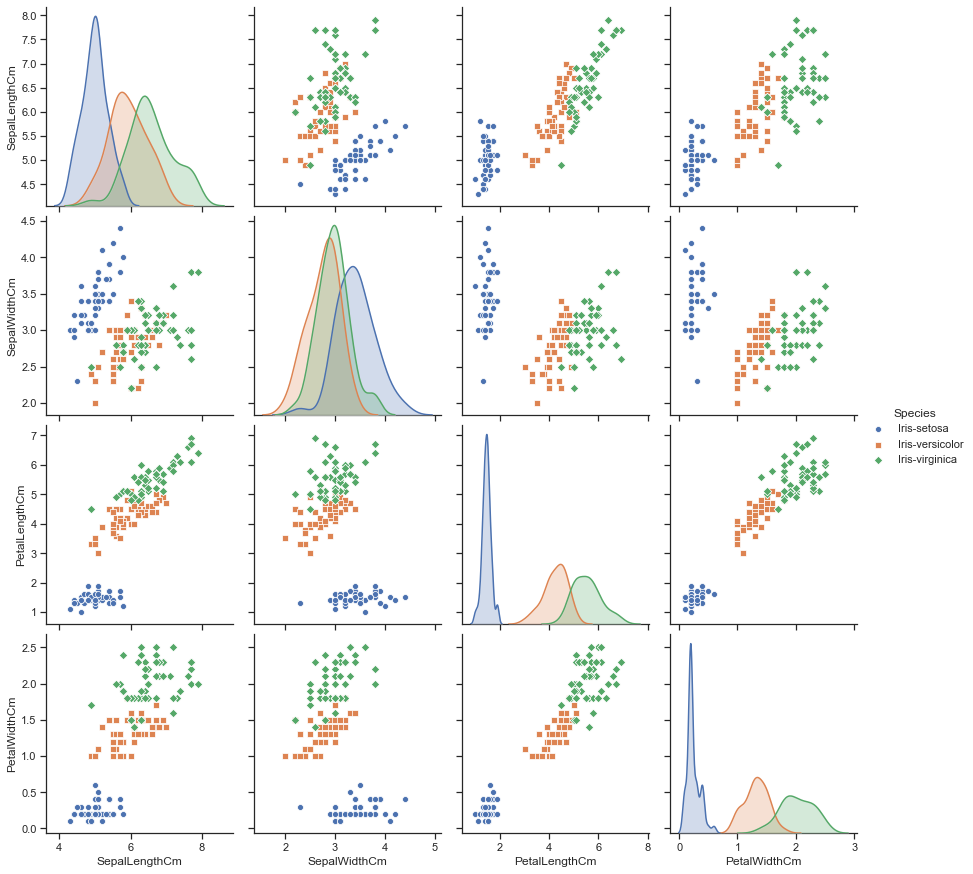

In [12]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df,hue = "Species", size=3, markers=["o", "s", "D"])

**Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.**

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4,random_state = 5)

# Train the model with K nearest neighbour algorithm

**To find the best value of K,we apply the loop over range(1,50) and append the accuracy score of each K into the list accu.**

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accu = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    w = accuracy_score(y_test,pred_i)
    accu.append(w)


**Plot the line graph of k = 1 to 50 and accu. to find the K with greatest accuracy**

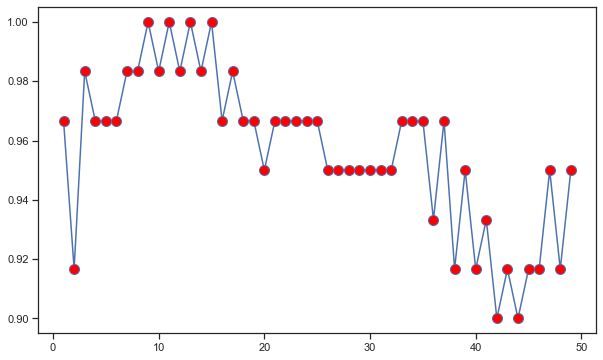

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),accu,marker='o',markersize=10,markerfacecolor ='red')

**Accuracy is gratest at k=9 so,predict the Species wih n_neighbours = 9**

In [16]:
knn = KNeighborsClassifier(n_neighbors= 9)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [17]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[20  0  0]
 [ 0 21  0]
 [ 0  0 19]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      1.00      1.00        21
 Iris-virginica       1.00      1.00      1.00        19

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60



**At k = 9 accuracy is 1.00 so,we cannot take k=9 because of overfitting.**

**Check the accuracy at k=3**

In [18]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[20  0  0]
 [ 0 20  1]
 [ 0  0 19]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.95      0.98        21
 Iris-virginica       0.95      1.00      0.97        19

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



In [19]:
accuracy = accuracy_score(y_test,y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 3)) + ' %.')

Accuracy of our model is equal 98.333 %.


**Here we get the best value of k for our Model i.e. k=3.**

### Predict the Class for specific data

In [25]:
knn.predict([[4.9,3.0,1.4,0.2]])

array(['Iris-setosa'], dtype=object)

In [27]:
knn.predict([[3.8,1.6,2.5,0.6]])

array(['Iris-versicolor'], dtype=object)